# **Improved detection of fraud cases for e-commerce and bank transactions**

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Used for checking for division by zero
sns.set_style('whitegrid')

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
df_creditcard = pd.read_csv('../data/creditcard.csv')

In [4]:
df_fraud = pd.read_csv('../data/Fraud_Data.csv')

In [5]:
df_ipaddress = pd.read_csv('../data/IpAddress_to_Country.csv')

#### *1. Handle Missing Values*

### *Data Profiling*

In [6]:
print("Creditcard data size ", df_creditcard.shape)
print("Fraud data size ", df_fraud.shape)
print("IpAddress data size ", df_ipaddress.shape)

Creditcard data size  (284807, 31)
Fraud data size  (151112, 11)
IpAddress data size  (138846, 3)


In [57]:
df_creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [58]:
df_fraud.columns

Index(['signup_time', 'purchase_time', 'purchase_value', 'source', 'browser',
       'sex', 'age', 'class', 'country', 'transaction_count', 'time_diff',
       'hour_of_day', 'day_of_week', 'time_since_signup'],
      dtype='object')

In [59]:
df_ipaddress.columns

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

#### *Check missing value*

In [61]:
df_creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [62]:
df_fraud.isnull().sum()

signup_time               0
purchase_time             0
purchase_value            0
source                    0
browser                   0
sex                       0
age                       0
class                     0
country                   0
transaction_count         0
time_diff            151112
hour_of_day               0
day_of_week               0
time_since_signup         0
dtype: int64

In [63]:
df_ipaddress.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

#### *2. Data Cleaning*

In [67]:
# remove duplicate
print("Creditcard duplicate data ",df_creditcard.duplicated().sum())
print("Fraud duplicate data ", df_fraud.duplicated().sum())
print("IP Address duplicate data ", df_ipaddress.duplicated().sum())

Creditcard duplicate data  1081
Fraud duplicate data  0
IP Address duplicate data  0


In [70]:
print("Drop duplicated data ", df_creditcard.drop_duplicates(inplace=True))

Drop duplicated data  None


In [71]:
df_creditcard.duplicated().sum()

np.int64(0)

In [60]:
df_creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [110]:
df_fraud.dtypes

signup_time          datetime64[ns]
purchase_time        datetime64[ns]
purchase_value                int64
source                        int64
browser                       int64
sex                          object
age                           int64
class                         int64
country                      object
transaction_count             int64
time_diff                   float64
hour_of_day                   int32
day_of_week                   int32
time_since_signup           float64
year                          int32
month                         int32
day                           int32
hour                          int32
year_signup                   int32
month_signup                  int32
day_signup                    int32
hour_signup                   int32
year_purchase                 int32
month_prchase                 int32
day_purchase                  int32
hour_purchase                 int32
signup_year                   int32
signup_month                

#### *Data type casting*

In [73]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'], errors='coerce')
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'], errors='coerce')

In [84]:
df_fraud['signup_year'] = df_fraud['signup_time'].dt.year
df_fraud['signup_month'] = df_fraud['signup_time'].dt.month
df_fraud['signup_day'] = df_fraud['signup_time'].dt.day
df_fraud['signup_hour'] = df_fraud['signup_time'].dt.hour

In [96]:
df_fraud['purchase_year'] = df_fraud['purchase_time'].dt.year
df_fraud['purchase_month'] = df_fraud['purchase_time'].dt.month
df_fraud['purchase_day'] = df_fraud['purchase_time'].dt.day
df_fraud['purchase_hour'] = df_fraud['purchase_time'].dt.hour

In [97]:
df_fraud.dtypes

signup_time          datetime64[ns]
purchase_time        datetime64[ns]
purchase_value                int64
source                        int64
browser                       int64
sex                          object
age                           int64
class                         int64
country                      object
transaction_count             int64
time_diff                   float64
hour_of_day                   int32
day_of_week                   int32
time_since_signup           float64
year                          int32
month                         int32
day                           int32
hour                          int32
year_signup                   int32
month_signup                  int32
day_signup                    int32
hour_signup                   int32
year_purchase                 int32
month_prchase                 int32
day_purchase                  int32
hour_purchase                 int32
signup_year                   int32
signup_month                

In [12]:
df_ipaddress.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [98]:
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [14]:
df_creditcard.sample(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
157723,110334.0,2.036212,-0.280491,-2.410847,-0.518392,2.453977,3.368323,-0.559822,0.708652,1.687261,...,-0.438351,-1.025843,0.385489,0.637620,-0.291259,0.179706,-0.080583,-0.071769,9.99,0
20744,31242.0,1.264797,0.121328,-0.467661,0.103489,0.539566,0.189991,0.164934,0.087521,-0.233656,...,-0.387426,-1.208616,0.024502,-1.173686,0.305550,0.224950,-0.060195,-0.016545,13.95,0


In [99]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151112 entries, 116708 to 109602
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   signup_time        151112 non-null  datetime64[ns]
 1   purchase_time      151112 non-null  datetime64[ns]
 2   purchase_value     151112 non-null  int64         
 3   source             151112 non-null  int64         
 4   browser            151112 non-null  int64         
 5   sex                151112 non-null  object        
 6   age                151112 non-null  int64         
 7   class              151112 non-null  int64         
 8   country            151112 non-null  object        
 9   transaction_count  151112 non-null  int64         
 10  time_diff          0 non-null       float64       
 11  hour_of_day        151112 non-null  int32         
 12  day_of_week        151112 non-null  int32         
 13  time_since_signup  151112 non-null  float64 

In [83]:
df_ipaddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846 non-null  int64 
 1   upper_bound_ip_address  138846 non-null  int64 
 2   country                 138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


In [17]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [19]:
df_ipaddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [20]:
# Check unique value and class balance
print("Creditcard Unique value in 'Class': ", df_creditcard['Class'].unique())
print("Creditcard Class distribution (counts) : ")
print(df_creditcard['Class'].value_counts())
print('Creditcard Class distribution (percentage)')
print(df_creditcard['Class'].value_counts(normalize=True) * 100)
print('---------------------------------------------------------------------------')
print('')
print("Fraud Unique value in 'Class':", df_fraud['class'].unique())
print('Fraud class distribution (counts) ')
print(df_fraud['class'].value_counts())
print("Frount class distribution (percentage) ")
print(df_fraud['class'].value_counts(normalize=True) * 100)

print('Fraud unique value in device ', df_fraud['device_id'].unique())
print('Fraud device distribution (counts)')
print(df_fraud['device_id'].value_counts())
print('Fraud device distribution(percentage)')
print(df_fraud['device_id'].value_counts(normalize=True) *100)

print('Fraud unique value in browser ', df_fraud['browser'].unique())
print('Fraud browser (counts)')
print(df_fraud['browser'].value_counts())
print('Fraud browser distribution(percentage)')
print(df_fraud['browser'].value_counts(normalize=True) *100)

print('Fraud unique value in sex ', df_fraud['sex'].unique())
print('Fraud sex (counts) ')
print(df_fraud['sex'].value_counts())
print('Fraud sex distribution (percentage)')
print(df_fraud['sex'].value_counts(normalize=True)*100)
print('---------------------------------------------------------------------------')
print("Countries list ", df_ipaddress['country'].unique().tolist())
print("Countries count ", df_ipaddress['country'].value_counts())
print("Countries distribution (percentage )")
print(df_ipaddress['country'].value_counts(normalize=True) * 100)

Creditcard Unique value in 'Class':  [0 1]
Creditcard Class distribution (counts) : 
Class
0    284315
1       492
Name: count, dtype: int64
Creditcard Class distribution (percentage)
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64
---------------------------------------------------------------------------

Fraud Unique value in 'Class': [0 1]
Fraud class distribution (counts) 
class
0    136961
1     14151
Name: count, dtype: int64
Frount class distribution (percentage) 
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64
Fraud unique value in device  ['QVPSPJUOCKZAR' 'EOGFQPIZPYXFZ' 'YSSKYOSJHPPLJ' ... 'LYSFABUCPCGBA'
 'MEQHCSJUBRBFE' 'ZINIADFCLHYPG']
Fraud device distribution (counts)
device_id
ITUMJCKWEYNDD    20
CQTUVBYIWWWBC    20
EQYVNEGOFLAWK    20
NGQCKIADMZORL    20
KIPFSCNUGOLDP    20
                 ..
UNUAVQXNWFBMO     1
TGHVAWBMZRDHH     1
WFIIFCPIOGMHT     1
NWSVDOHYIOBDR     1
KFZGQIWDIRLZB     1
Name: count, Length: 137956, dtype:

RESULT : 
- in creditcard there are 284,315 normal transactions and 492 fraud transaction. The dataset is heavily imbalanced.
- in fraud  there are 136,961 normal transactions and 14151 fraud transaction. The dataset is heavily imbalanced.
- 33.76% IPaddress from United States

#### *3. Exploratory Data Analysis (EDA)*

    -Summary Statistics


In [21]:
df_creditcard.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
df_fraud.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-02-24 22:55:49,2015-07-17 23:22:55,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


In [23]:
df_ipaddress.describe(include='all')

,lower_bound_ip_address,upper_bound_ip_address,country
count,1.388460e+05,1.388460e+05,138846
unique,NaN,NaN,235
top,NaN,NaN,United States
freq,NaN,NaN,46868
mean,2.724532e+09,2.724557e+09,NaN
std,8.975215e+08,8.974979e+08,NaN
min,1.677722e+07,1.677747e+07,NaN
25%,1.919930e+09,1.920008e+09,NaN
50%,3.230887e+09,3.230888e+09,NaN
75%,3.350465e+09,3.350466e+09,NaN


## Univariate Analysis

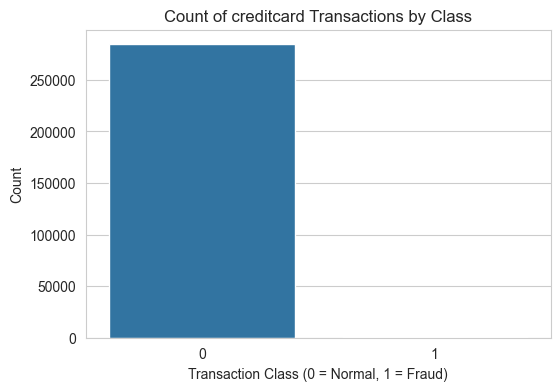

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_creditcard)
plt.title('Count of creditcard Transactions by Class')
plt.xlabel('Transaction Class (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
sns.set_theme(style="whitegrid")
plt.show()

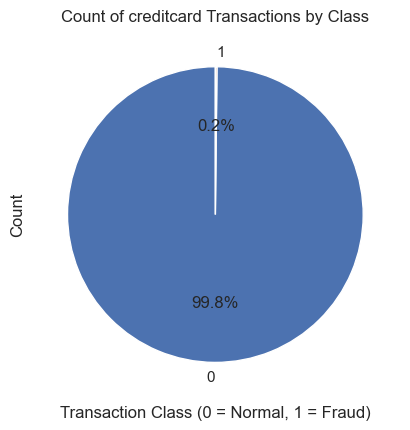

In [28]:
vc = df_creditcard['Class'].value_counts()
plt.pie(vc, labels=vc.index, autopct="%1.1f%%", startangle=90)
plt.title('Count of creditcard Transactions by Class')
plt.xlabel('Transaction Class (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
sns.set_theme(style="whitegrid")
plt.show()

In [29]:
# Count and print unique transaction amount
df_creditcard['Amount'].value_counts()

Amount
1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
202.24        1
252.85        1
615.52        1
180.93        1
807.48        1
Name: count, Length: 32767, dtype: int64

In [30]:
# Percentage distribution of Amount
df_creditcard['Amount'].value_counts(normalize=True) * 100

Amount
1.00      4.806062
1.98      2.122139
0.89      1.710632
9.99      1.666743
15.00     1.151657
            ...   
202.24    0.000351
252.85    0.000351
615.52    0.000351
180.93    0.000351
807.48    0.000351
Name: proportion, Length: 32767, dtype: float64

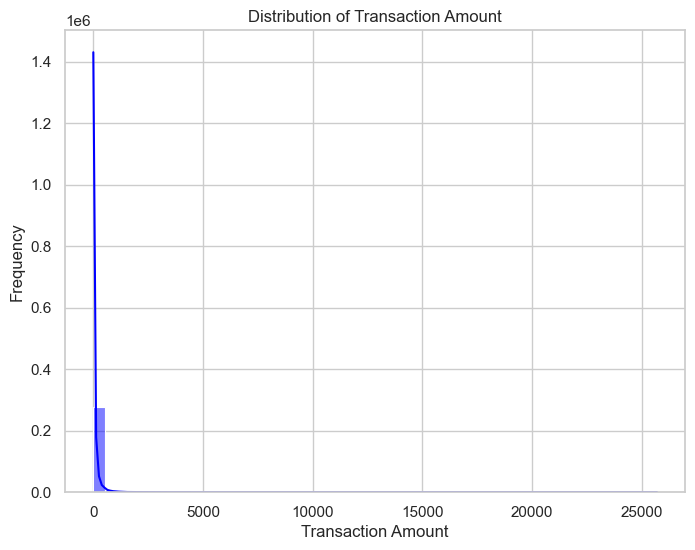

In [31]:
# Distribution of transaction Amount

plt.figure(figsize=(8, 6))
sns.histplot(df_creditcard['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Count and print unique transaction times (duration)
print(df_creditcard["Time"].value_counts())

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
172760.0     1
172758.0     1
172757.0     1
172756.0     1
172754.0     1
Name: count, Length: 124592, dtype: int64


In [33]:
# Show percentage distribution of transaction times (duration)
df_creditcard["Time"].value_counts(normalize=True)*100

Time
163152.0    0.012640
64947.0     0.009129
68780.0     0.008778
3767.0      0.007373
3770.0      0.007022
              ...   
172760.0    0.000351
172758.0    0.000351
172757.0    0.000351
172756.0    0.000351
172754.0    0.000351
Name: proportion, Length: 124592, dtype: float64

Text(0, 0.5, 'Count')

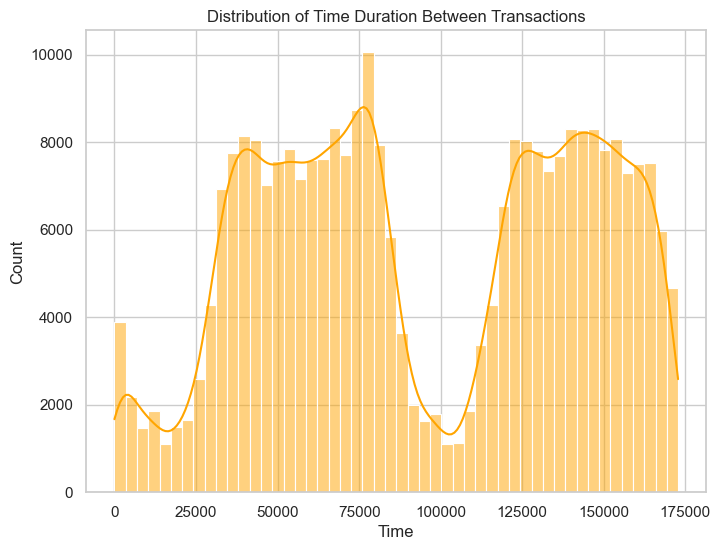

In [34]:
# Distribution of Time duration between transactions

plt.figure(figsize=(8,6))
sns.histplot(df_creditcard["Time"], bins=50, kde=True, color="orange")
plt.title("Distribution of Time Duration Between Transactions")
plt.xlabel("Time")
plt.ylabel("Count")

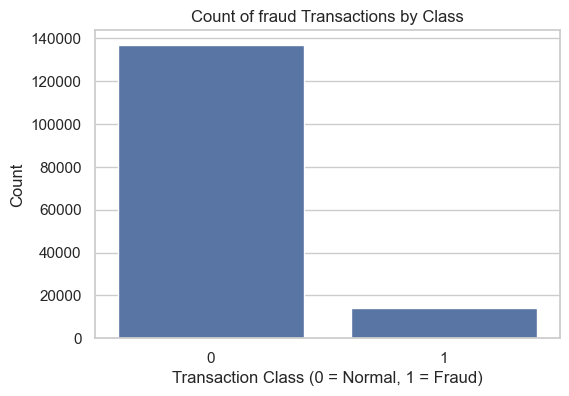

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_fraud)
plt.title('Count of fraud Transactions by Class')
plt.xlabel('Transaction Class (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

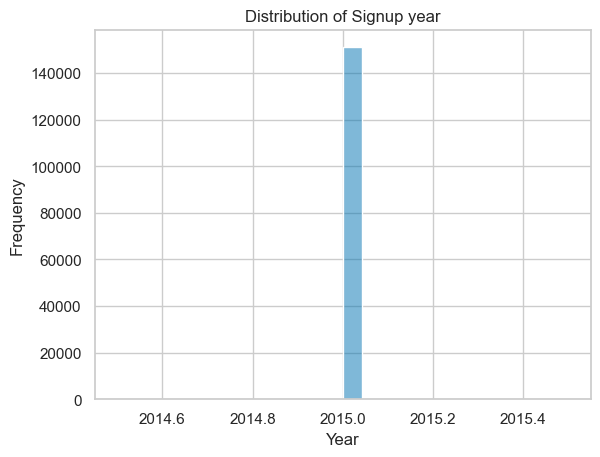

In [86]:
sns.histplot(df_fraud['signup_year'], bins=24, kde=True)
plt.title('Distribution of Signup year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

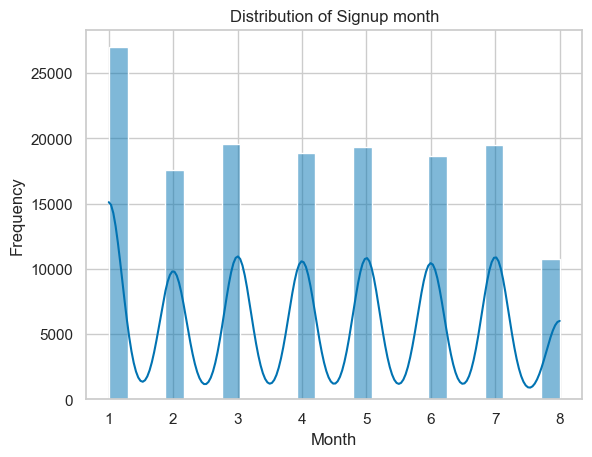

In [89]:
sns.histplot(df_fraud['signup_month'], bins=24, kde=True)
plt.title('Distribution of Signup month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

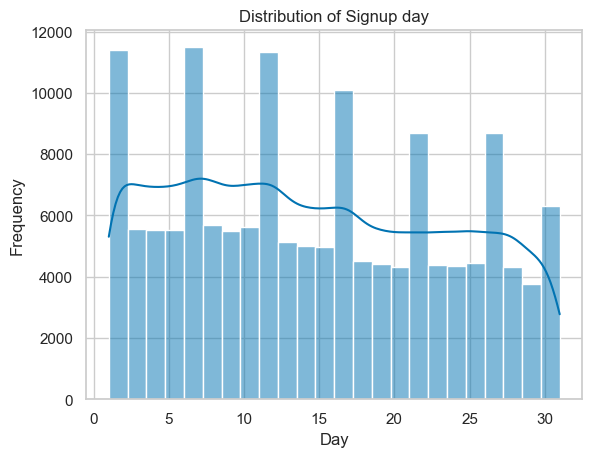

In [90]:
sns.histplot(df_fraud['signup_day'], bins=24, kde=True)
plt.title('Distribution of Signup day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

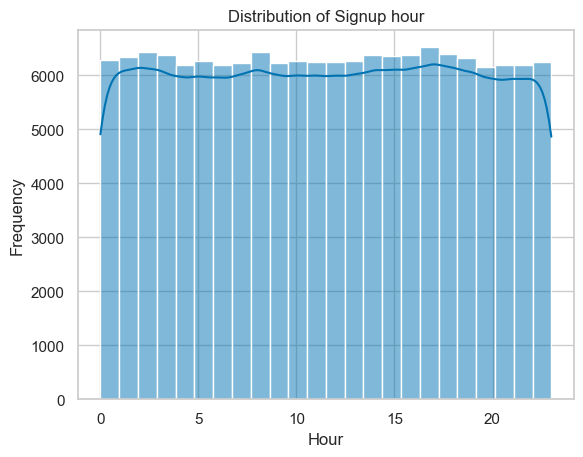

In [88]:
sns.histplot(df_fraud['signup_hour'], bins=24, kde=True)
plt.title('Distribution of Signup hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

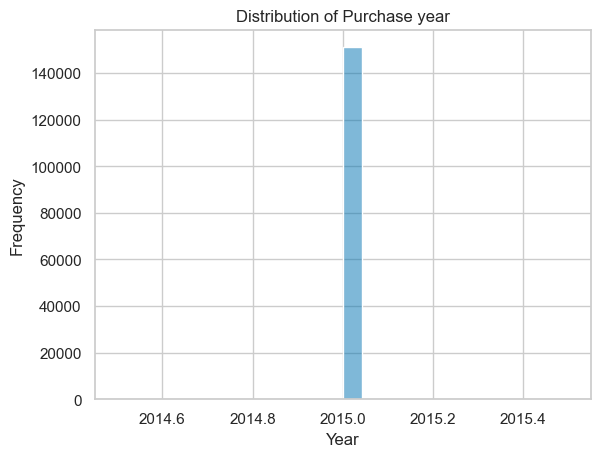

In [94]:
sns.histplot(df_fraud['purchase_year'], bins=24, kde=True)
plt.title('Distribution of Purchase year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

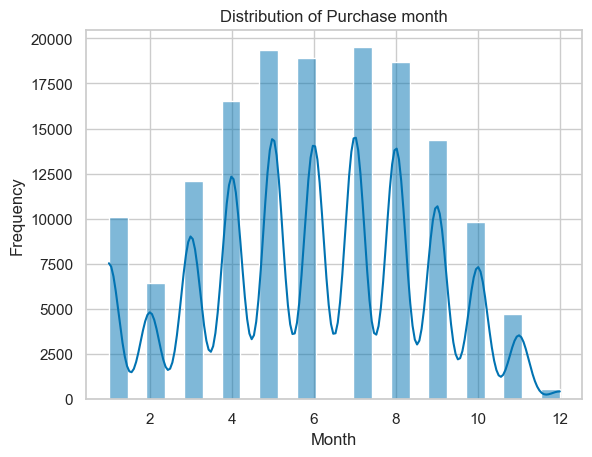

In [100]:
sns.histplot(df_fraud['purchase_month'], bins=24, kde=True)
plt.title('Distribution of Purchase month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

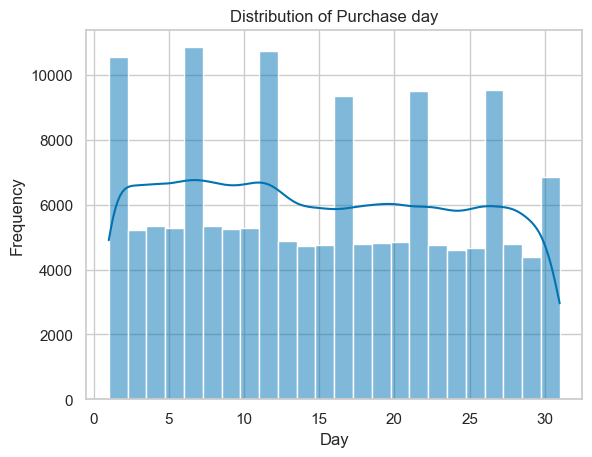

In [101]:
sns.histplot(df_fraud['purchase_day'], bins=24, kde=True)
plt.title('Distribution of Purchase day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

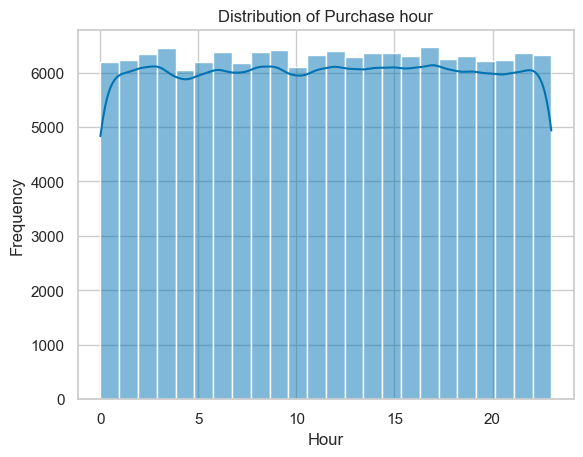

In [102]:
sns.histplot(df_fraud['purchase_hour'], bins=24, kde=True)
plt.title('Distribution of Purchase hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

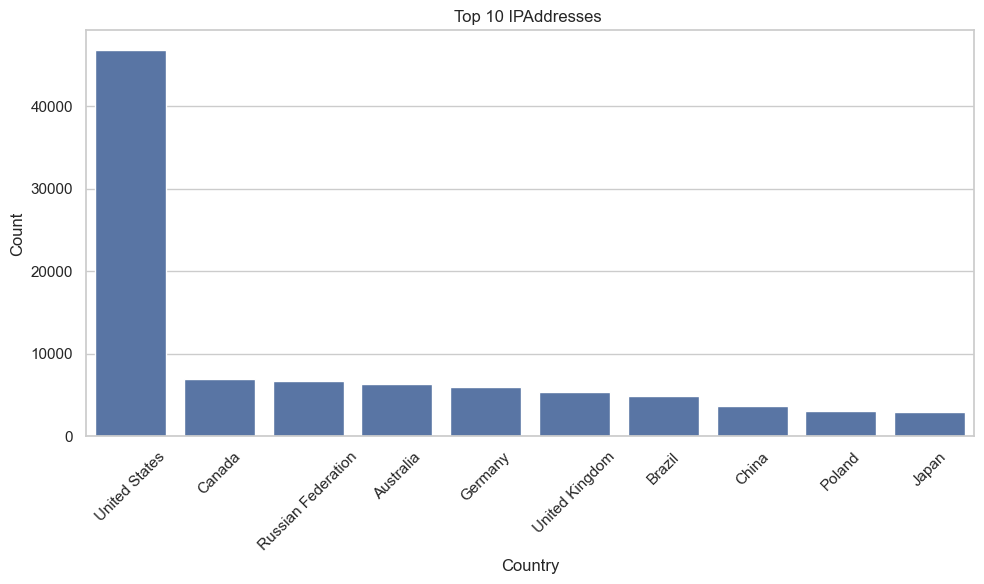

In [36]:
plt.figure(figsize=(10, 6))
top10 = df_ipaddress['country'].value_counts().nlargest(10)
sns.barplot(x=top10.index.astype(str), y=top10.values)
plt.title(f"Top 10 IPAddresses ")
plt.xlabel('Country')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
df_fraud.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

#### *Bivariate analysis*

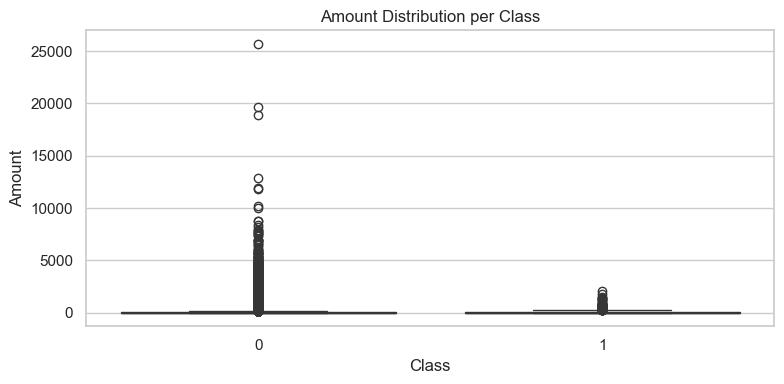

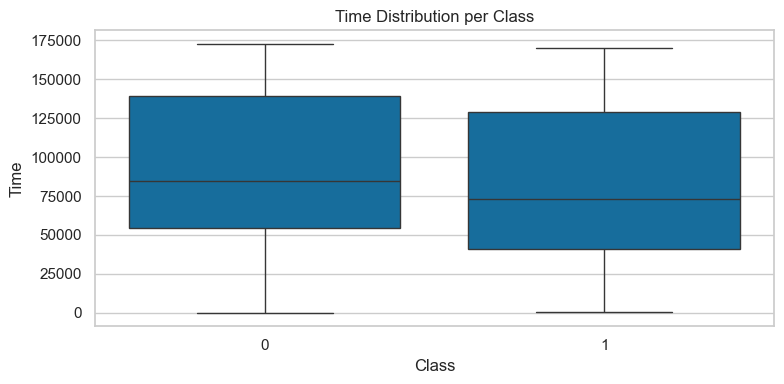

In [106]:
# Distribution of Time and Amount per Class (0=Normal, 1=fraud case) 

# Boxplot Figure 1: Amount vs Class

plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Amount", data=df_creditcard)
plt.title("Amount Distribution per Class")
plt.tight_layout()
plt.show()

# Boxplot Figure 2: Time vs Class

plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Time", data=df_creditcard)
plt.title("Time Distribution per Class")
plt.tight_layout()
plt.show()

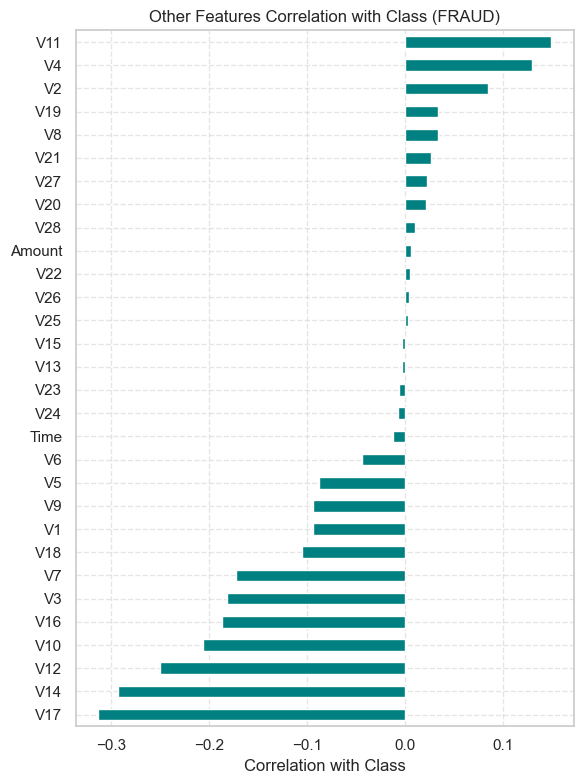

In [109]:
# Correlation between Features and Class 1 (Fraud)

correlations = df_creditcard.corr()["Class"].drop("Class").sort_values()

plt.figure(figsize=(6, 8))
correlations.plot(kind="barh", color="teal")

plt.title("Other Features Correlation with Class (FRAUD)")
plt.xlabel("Correlation with Class")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

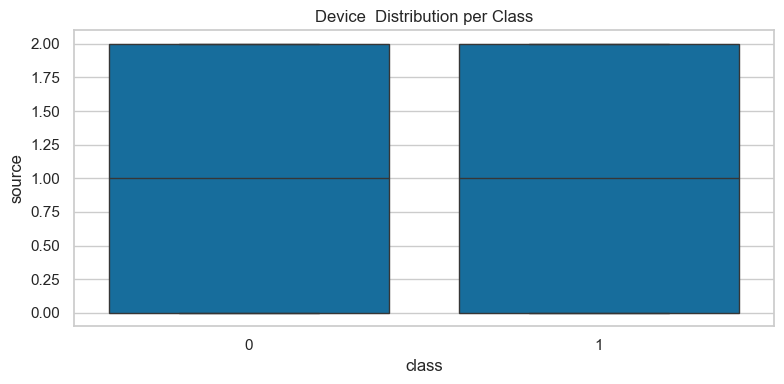

In [115]:
# Distribution of device a per Class (0=Normal, 1=fraud case) 

# Boxplot Figure 1: device vs Class

plt.figure(figsize=(8,4))
sns.boxplot(x="class", y="source", data=df_fraud)
plt.title("Device  Distribution per Class")
plt.tight_layout()
plt.show()

# Boxplot Figure 2: Time vs Class

# plt.figure(figsize=(8,4))
# sns.boxplot(x="class", y="Time", data=df_fraud)
# plt.title("Time Distribution per Class")
# plt.tight_layout()
# plt.show()

## 4. Merge Datasets for Geolocation Analysis

In [122]:
df_f = pd.read_csv('../data/Fraud_Data.csv')

In [123]:
df_f.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [130]:
df_fraud['ip_address'] = df_f['ip_address']

In [131]:
import ipaddress
df_ipaddress['lower_bound_ip_address'] = df_ipaddress['lower_bound_ip_address'].astype(float).astype(int)
df_ipaddress['upper_bound_ip_address'] = df_ipaddress['upper_bound_ip_address'].astype(float).astype(int)
df_fraud['ip_address'] = df_fraud['ip_address'].astype(float).astype(int)
df_ipaddress['lower_bound_ip_address'] = df_ipaddress['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df_ipaddress['upper_bound_ip_address'] = df_ipaddress['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df_fraud['ip_address_int'] = df_fraud['ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

### Merge IP Data to Fraud Data

In [135]:
# Merge using interval logic
def find_country(ip_int):
    match = df_ipaddress[(df_ipaddress['lower_bound_ip_address'] <= ip_int) & (df_ipaddress['upper_bound_ip_address'] >= ip_int)]
    return match.iloc[0]['country'] if not match.empty else 'Unknown'

df_fraud['country'] = df_fraud['ip_address_int'].apply(find_country)

## Feature Engineering

### Transaction frequency and velocity per user

In [40]:
# Number of transactions per user
df_fraud['transaction_count'] = df_fraud.groupby('user_id')['user_id'].transform('count')

# Time delta between purchases
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])
df_fraud = df_fraud.sort_values(['user_id', 'purchase_time'])
df_fraud['time_diff'] = df_fraud.groupby('user_id')['purchase_time'].diff().dt.total_seconds()


### Time-based features

In [41]:
df_fraud['hour_of_day'] = df_fraud['purchase_time'].dt.hour
df_fraud['day_of_week'] = df_fraud['purchase_time'].dt.dayofweek

# Signup to purchase
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['time_since_signup'] = (df_fraud['purchase_time'] - df_fraud['signup_time']).dt.total_seconds()


## Data Transformation

### Handle Class Imbalance

In [42]:
for col in df_fraud.select_dtypes(include='object').columns:
    print(col, df_fraud[col].nunique())


device_id 137956
source 3
browser 5
sex 2
country 182


In [43]:
# Drop high-cardinality or uninformative columns
df_fraud = df_fraud.drop(columns=['device_id', 'user_id', 'ip_address', 'ip_address_int'])

# One-hot encode only low-cardinality categoricals
low_card_cols = ['browser', 'source', 'sex', 'country']
df_encoded = pd.get_dummies(df_fraud, columns=low_card_cols, drop_first=True)

In [44]:
from sklearn.preprocessing import LabelEncoder

df_fraud['browser'] = LabelEncoder().fit_transform(df_fraud['browser'])
df_fraud['source'] = LabelEncoder().fit_transform(df_fraud['source'])

### Encode Categorical Features

In [45]:
merged_df = pd.concat([df_creditcard, df_fraud, df_ipaddress], axis=1)


In [46]:
print(merged_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'signup_time', 'purchase_time', 'purchase_value', 'source',
       'browser', 'sex', 'age', 'class', 'country', 'transaction_count',
       'time_diff', 'hour_of_day', 'day_of_week', 'time_since_signup',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country'],
      dtype='object')


In [47]:
merged_df.isna().sum()

Time                           0
V1                             0
V2                             0
V3                             0
V4                             0
V5                             0
V6                             0
V7                             0
V8                             0
V9                             0
V10                            0
V11                            0
V12                            0
V13                            0
V14                            0
V15                            0
V16                            0
V17                            0
V18                            0
V19                            0
V20                            0
V21                            0
V22                            0
V23                            0
V24                            0
V25                            0
V26                            0
V27                            0
V28                            0
Amount                         0
Class     

In [48]:
merged_df.dropna(inplace=True)
merged_df.isna().sum()

Time                      0
V1                        0
V2                        0
V3                        0
V4                        0
V5                        0
V6                        0
V7                        0
V8                        0
V9                        0
V10                       0
V11                       0
V12                       0
V13                       0
V14                       0
V15                       0
V16                       0
V17                       0
V18                       0
V19                       0
V20                       0
V21                       0
V22                       0
V23                       0
V24                       0
V25                       0
V26                       0
V27                       0
V28                       0
Amount                    0
Class                     0
signup_time               0
purchase_time             0
purchase_value            0
source                    0
browser             

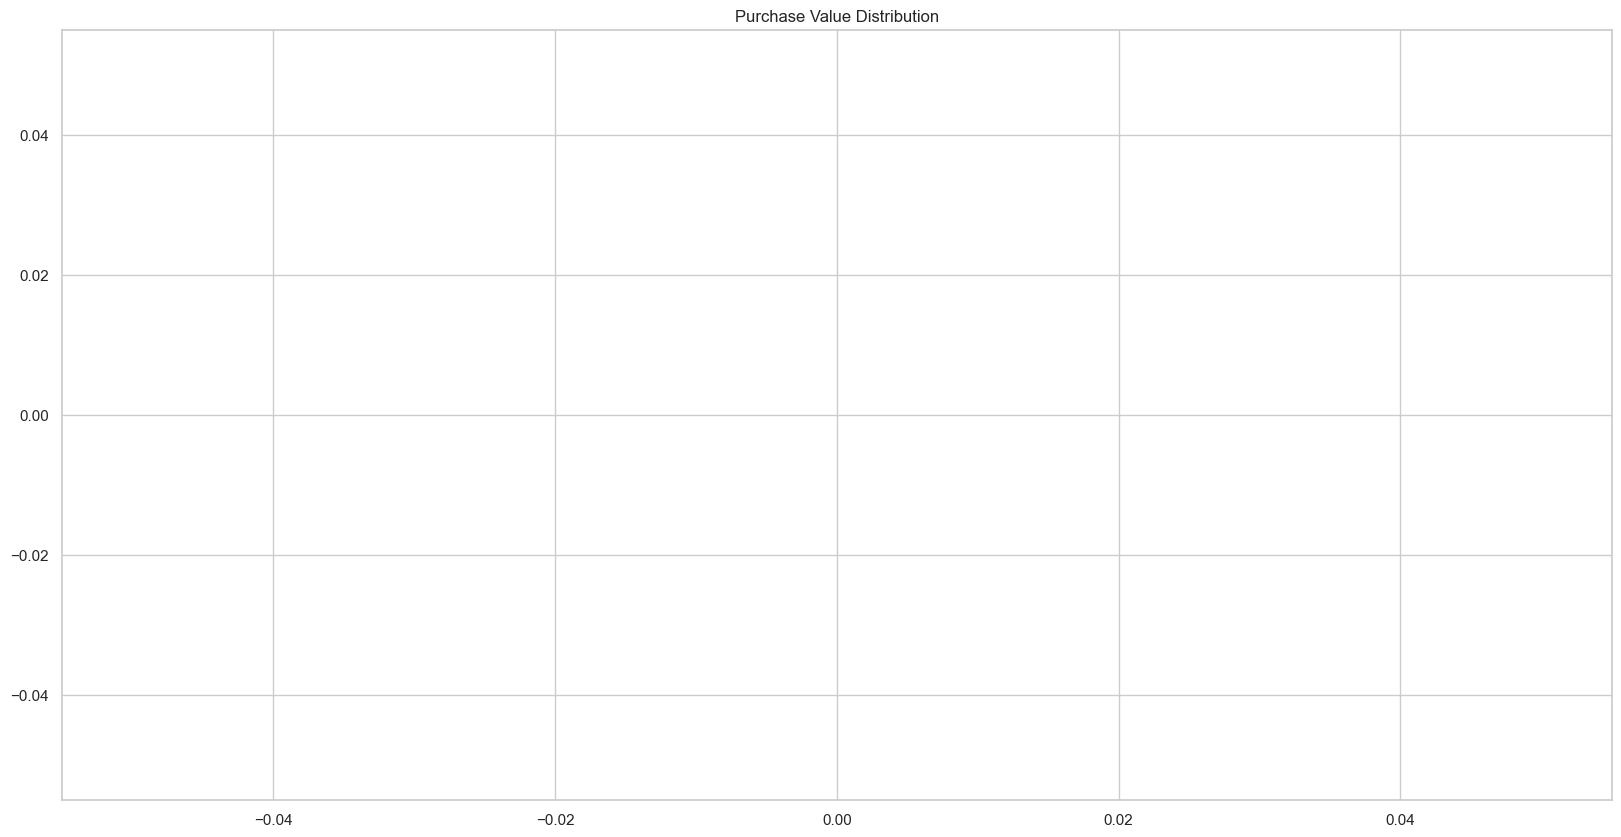

In [49]:
plt.figure(figsize=(20, 10))
sns.set_palette("colorblind")
sns.histplot(merged_df['purchase_value'], kde=True)
plt.title('Purchase Value Distribution')
plt.show()

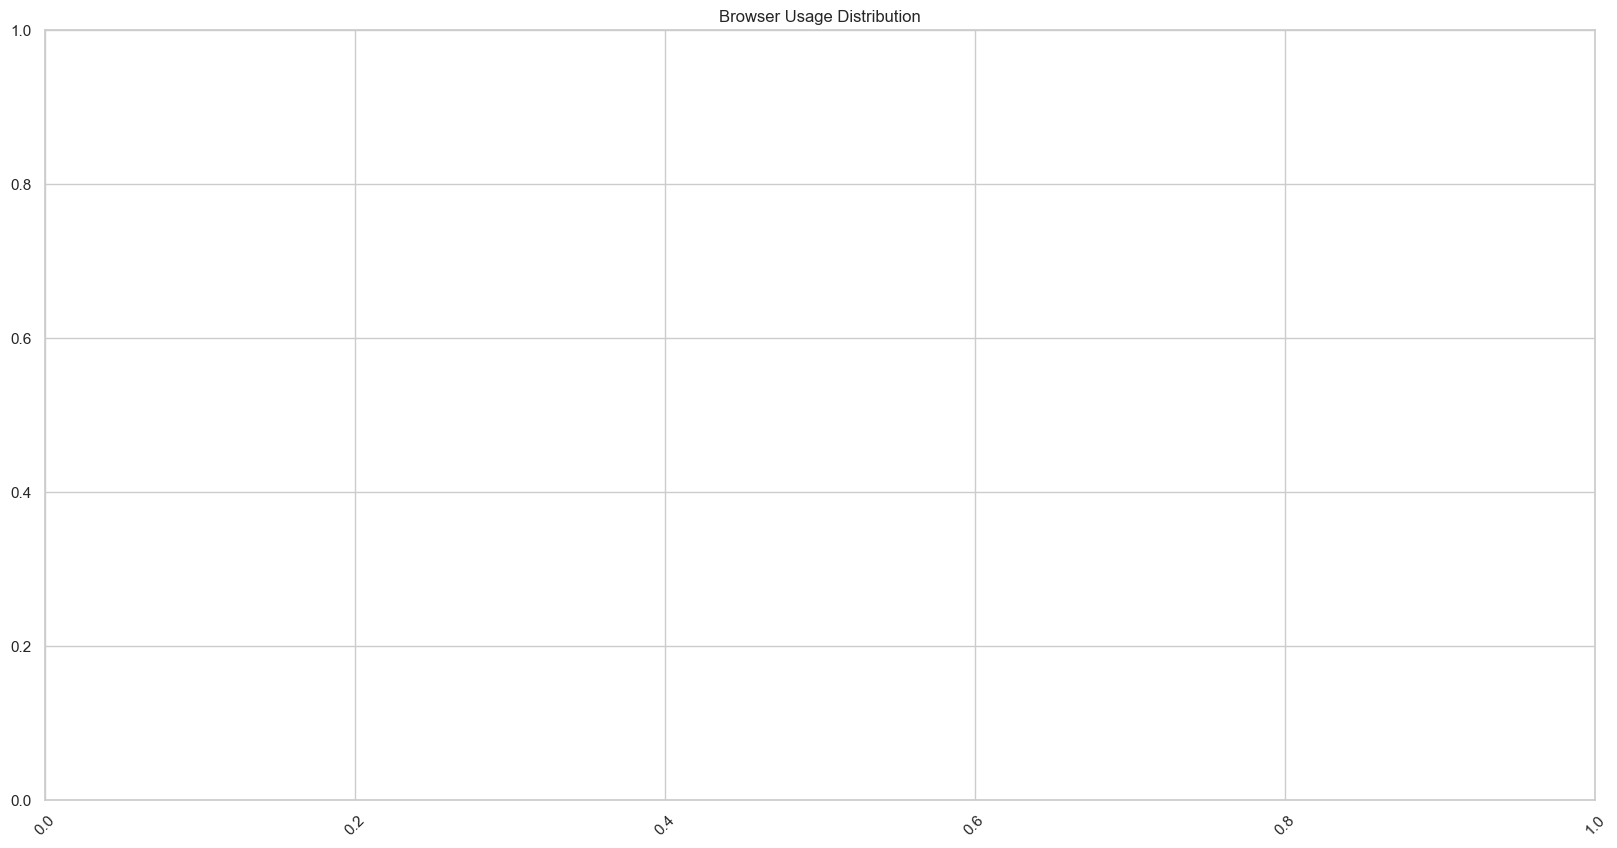

In [50]:
plt.figure(figsize=(20, 10))
sns.set_palette("colorblind")
sns.countplot(x='browser', data=merged_df, order=merged_df['browser'].value_counts().index[:10])
plt.title('Browser Usage Distribution')
plt.xticks(rotation=45)
plt.show()

## Numerical vs Categorical

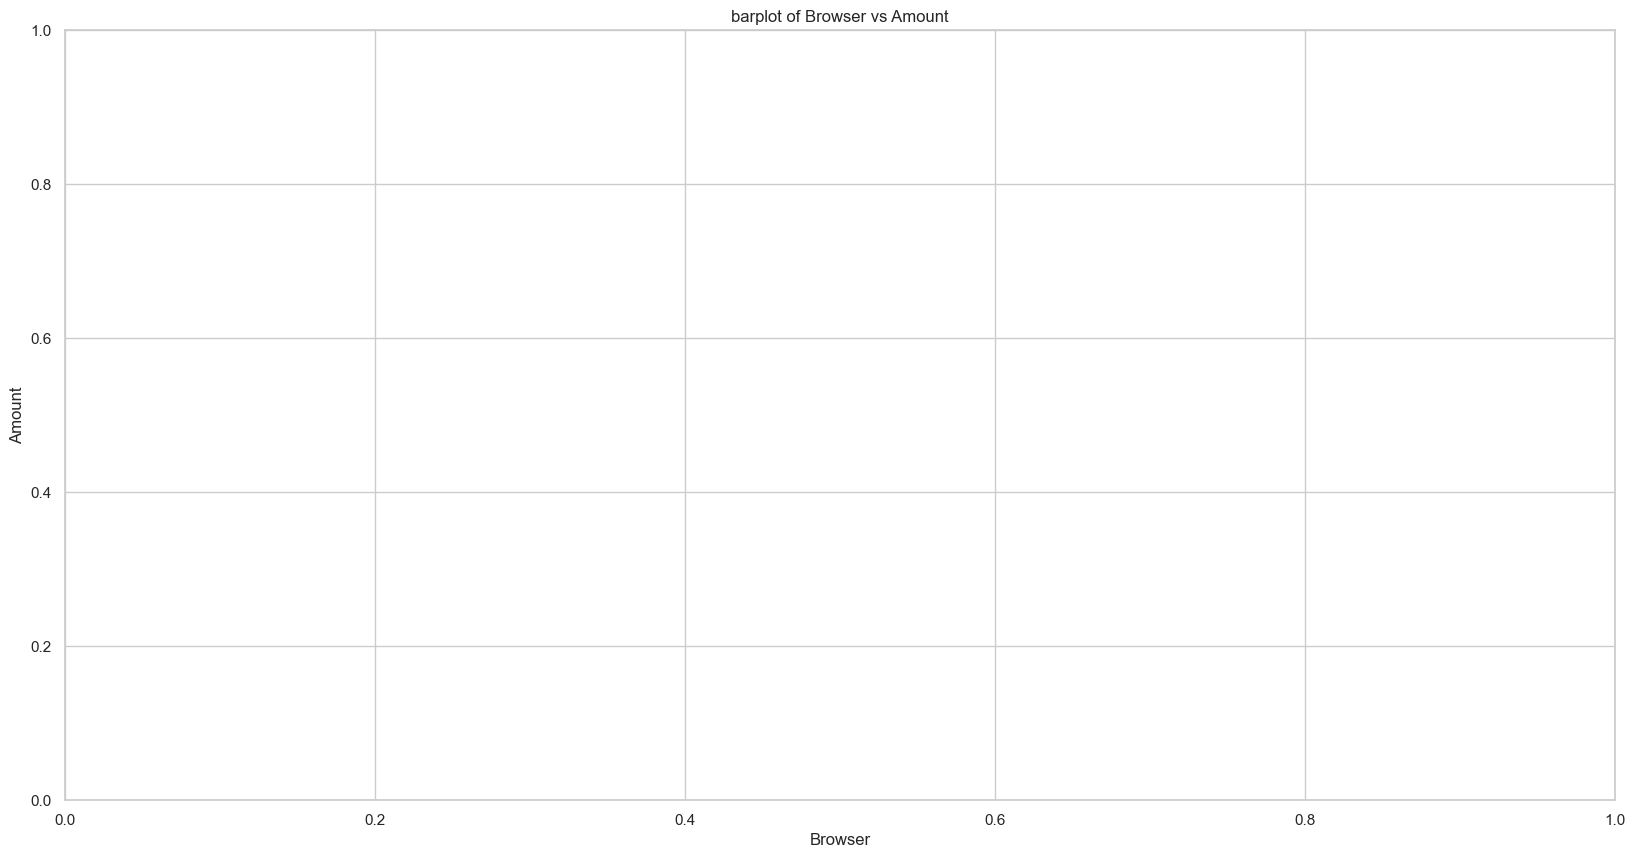

In [51]:
plt.figure(figsize=(20, 10))
sns.set_palette("colorblind")
sns.barplot(x='browser', y='Amount', data=merged_df, hue='class')
plt.title("barplot of Browser vs Amount")
plt.xlabel("Browser")
plt.ylabel('Amount')
plt.show()

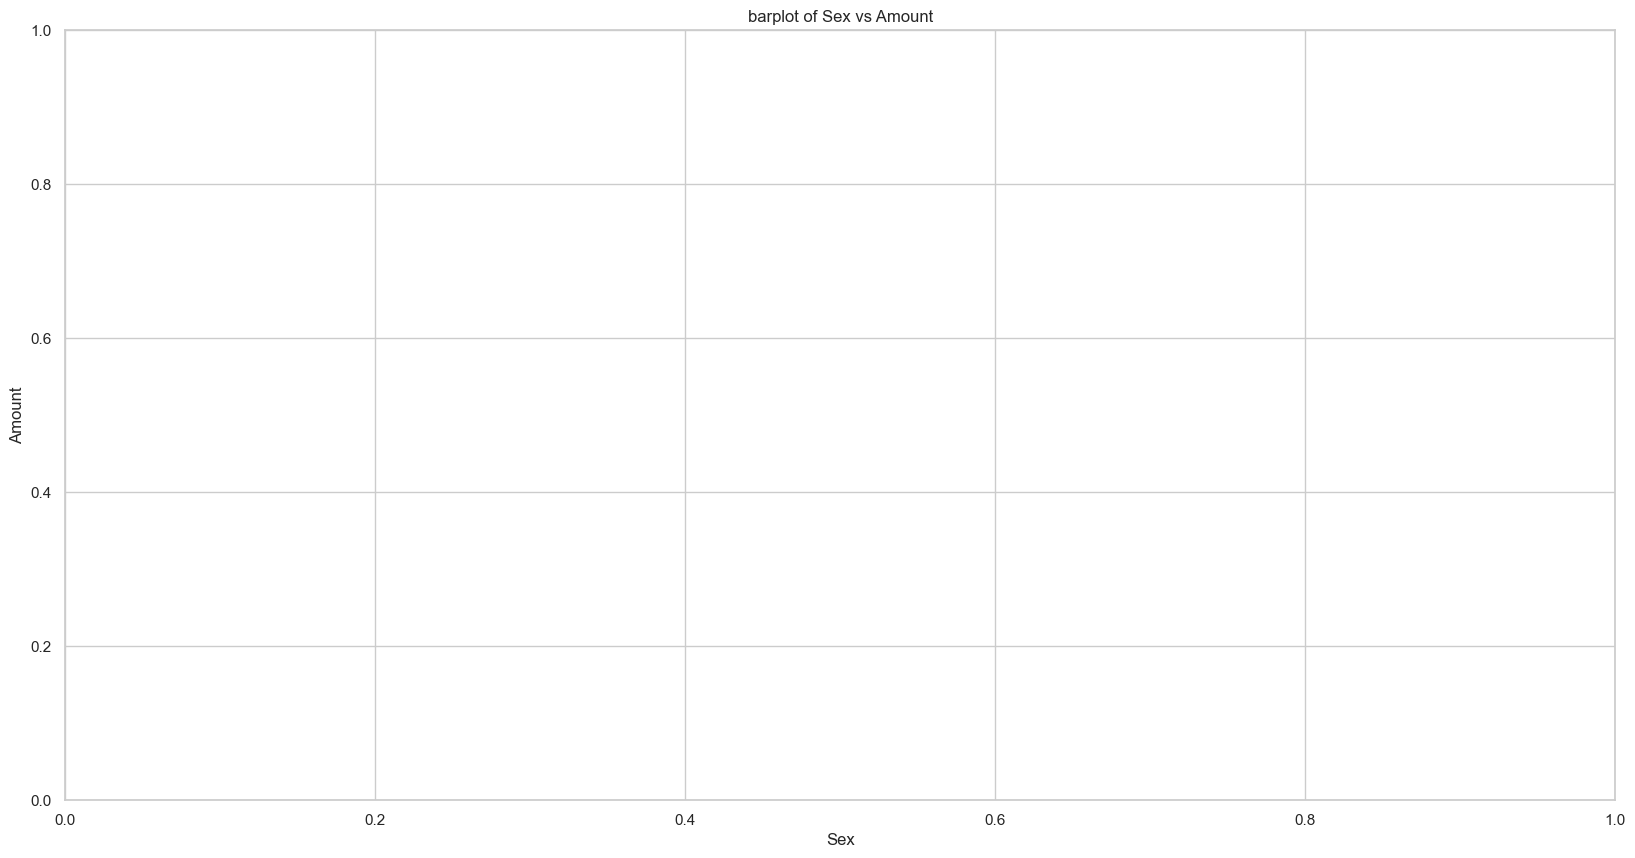

In [52]:
plt.figure(figsize=(20, 10))
sns.set_palette("colorblind")
sns.barplot(x='sex', y='Amount', data=merged_df, hue='class')
plt.title("barplot of Sex vs Amount")
plt.xlabel("Sex")
plt.ylabel('Amount')
plt.show()

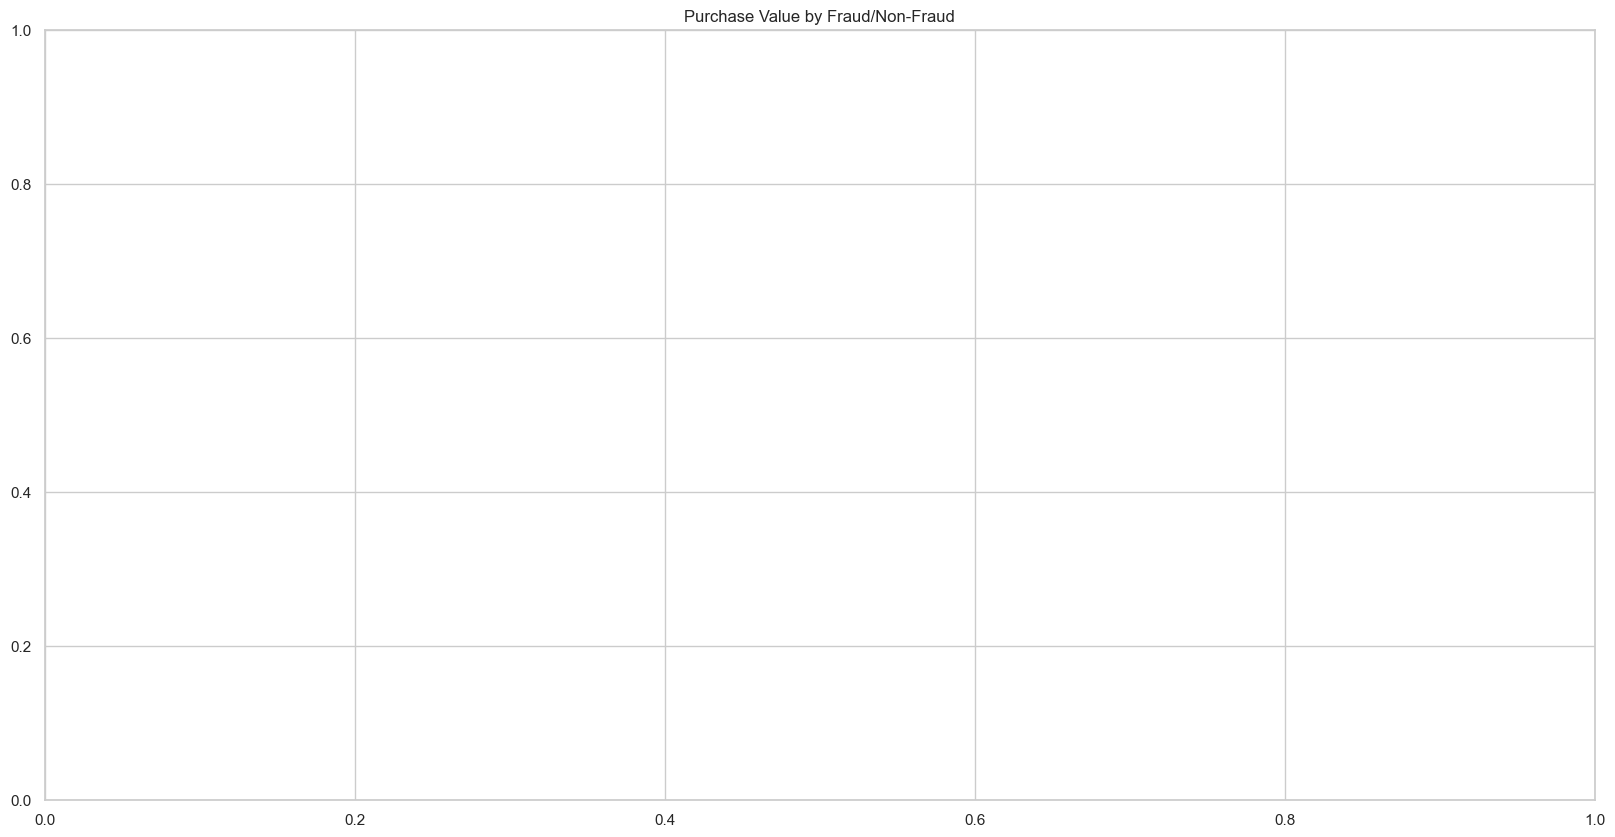

In [53]:
plt.figure(figsize=(20, 10))
sns.set_palette("colorblind")
sns.boxplot(x='class', y='purchase_value', data=merged_df)
plt.title('Purchase Value by Fraud/Non-Fraud')
plt.show()

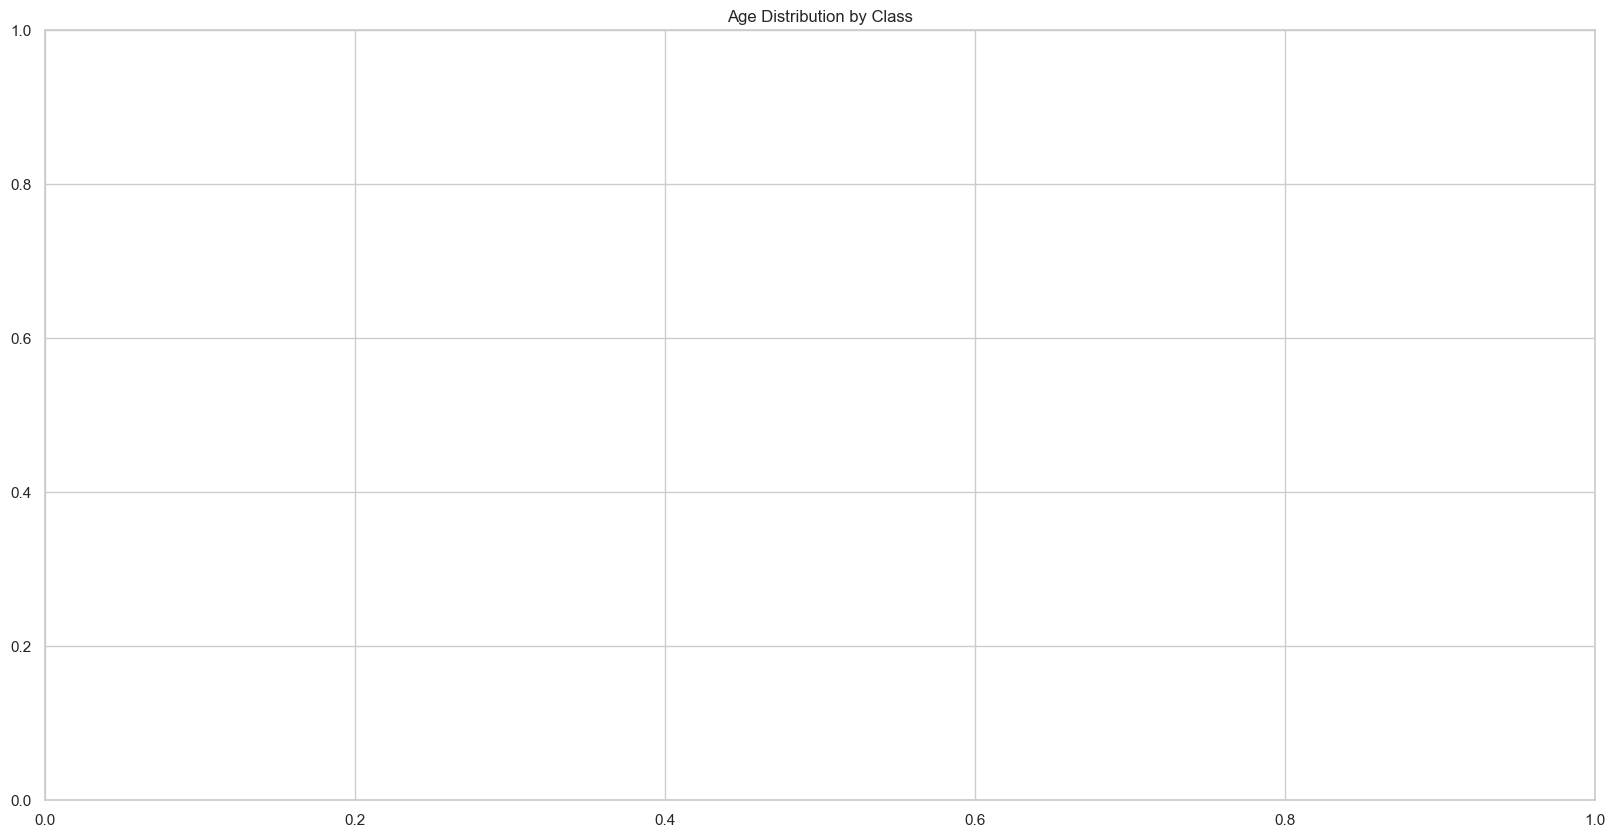

In [54]:
plt.figure(figsize=(20, 10))
sns.set_palette("colorblind")
sns.violinplot(x='class', y='age', data=merged_df)
plt.title('Age Distribution by Class')
plt.show()

## Categorical vs Categorical

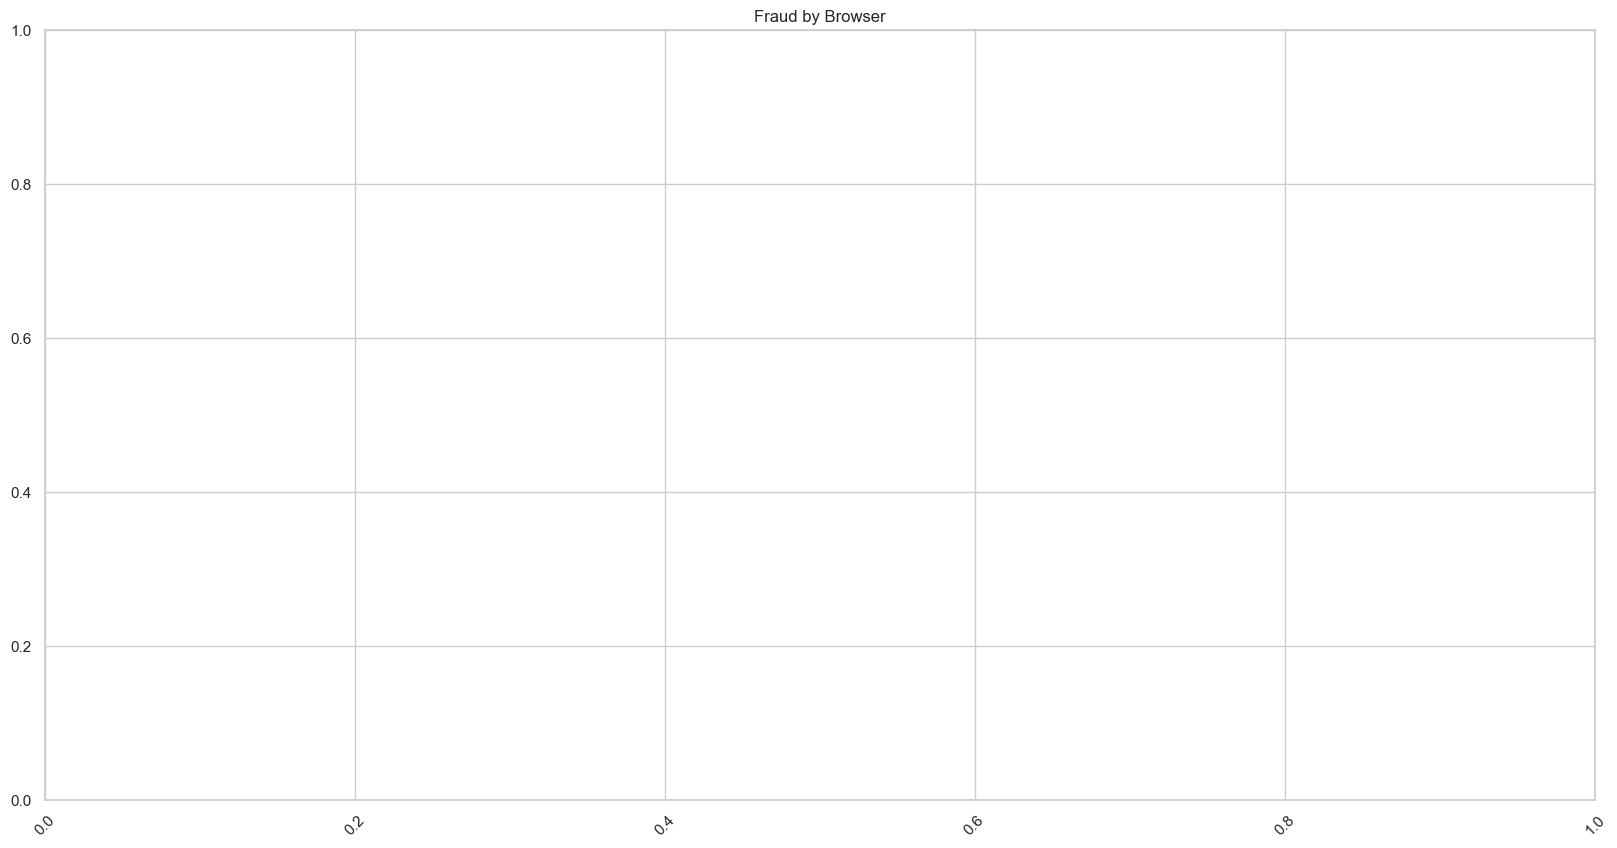

In [55]:
plt.figure(figsize=(20, 10))
sns.set_palette("colorblind")
sns.countplot(x='browser', hue='class', data=merged_df)
plt.title('Fraud by Browser')
plt.xticks(rotation=45)
plt.show()

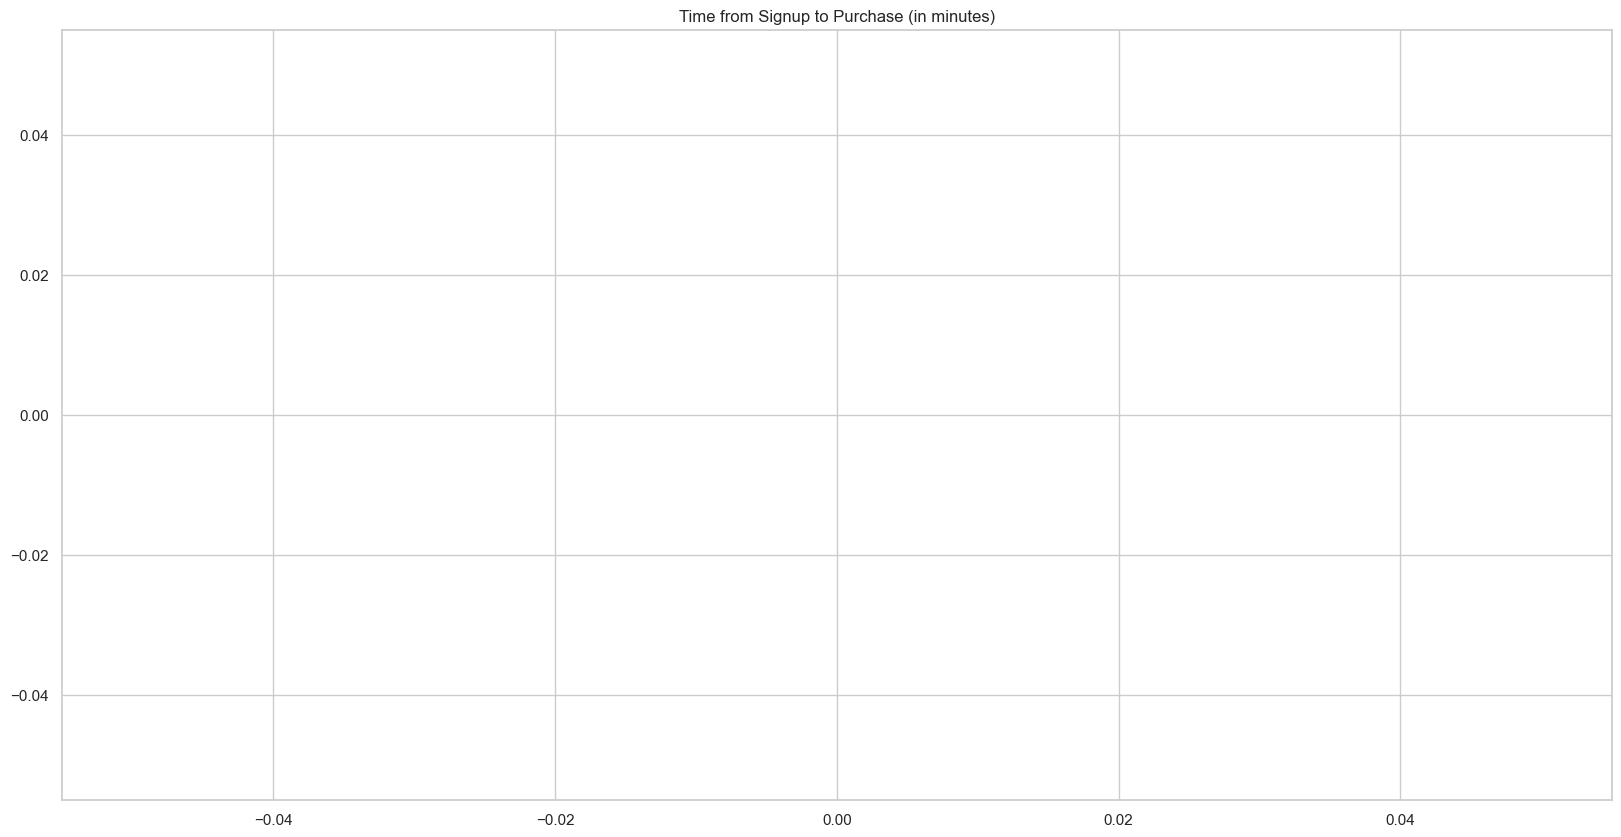

In [137]:
merged_df['signup_time'] = pd.to_datetime(merged_df['signup_time'])
merged_df['purchase_time'] = pd.to_datetime(merged_df['purchase_time'])

# Time difference feature
merged_df['signup_to_purchase'] = (merged_df['purchase_time'] - merged_df['signup_time']).dt.total_seconds() / 60
sns.set_palette("colorblind")
plt.figure(figsize=(20, 10))
sns.histplot(merged_df['signup_to_purchase'], bins=50, kde=True)
plt.title('Time from Signup to Purchase (in minutes)')
plt.show()


## Correlation (Numerical Features)

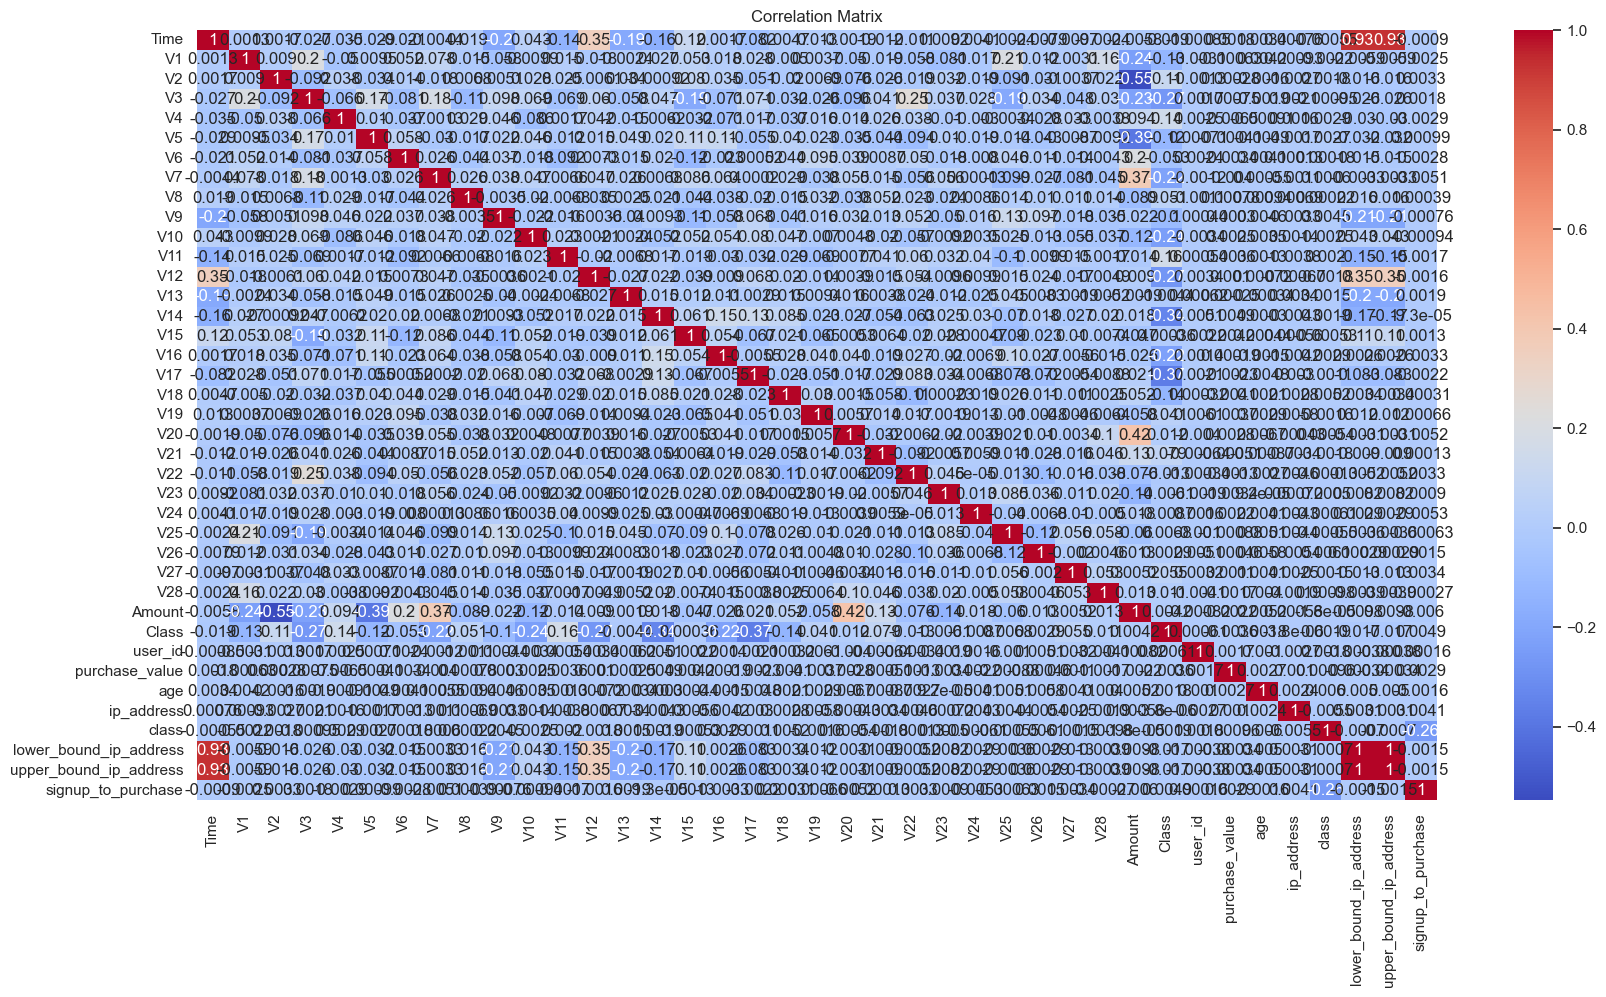

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Data Transformation

In [ ]:
from sklearn.model_selection import train_test_split
X = df_creditcard.drop(columns=['Class'])

# Target
y = df_creditcard['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)


In [141]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [142]:
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

Before SMOTE:
Class
0    198277
1       331
Name: count, dtype: int64

After SMOTE:
Class
0    198277
1    198277
Name: count, dtype: int64


In [143]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("After Undersampling:")
print(y_train_under.value_counts())


After Undersampling:
Class
0    331
1    331
Name: count, dtype: int64


### Normalize or Scale Numerical Features

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [145]:
# Trainng split and data leakage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Scale training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
